# Game Optimization Project Notebook

Authored By: Simon Lidwell

----------

This project aims to explore game winning optimization algorithms for the sake of having fun and having a deeper understanding of how to win commonly played games like Tic-Tac-Toe and Connect4.

I will start with Tic-Tac-Toe as it is a great introduction to game strategy due to the limited number of possible outcomes.

The end of this project will contain a comprehensive analysis of game optimization theory.

## Optimizing Tic-Tac-Toe

In [131]:
from src.utils import TicTacToe

In [132]:
game1 = TicTacToe()

In [133]:
game1.get_or_create_game().model_dump()

{'id': UUID('e5928e04-b018-4b4c-86b5-e7339944107e'),
 'createdat': datetime.datetime(2024, 12, 10, 23, 5, 9, 655384),
 'winner': None,
 'game_type': <GameType.TIC_TAC_TOE: 'TicTacToe'>,
 'moves': []}

In [134]:
game1.get_moves()

[]

In [135]:
game1.print_board()

0  0 | 1 | 2 
   --------- 
1  0 | 1 | 2 
   --------- 
2  0 | 1 | 2 


In [136]:
game1.make_move(player='X', row=1, col=0)

0  0 | 1 | 2 
   --------- 
1  X | 1 | 2 
   --------- 
2  0 | 1 | 2 
AI chooses to place at (0, 0)
0  O | 1 | 2 
   --------- 
1  X | 1 | 2 
   --------- 
2  0 | 1 | 2 


'Player X make your move'

In [137]:
game1.make_move(player='X', row=1, col=1)

0  O | 1 | 2 
   --------- 
1  X | X | 2 
   --------- 
2  0 | 1 | 2 
AI chooses to place at (1, 2)
0  O | 1 | 2 
   --------- 
1  X | X | O 
   --------- 
2  0 | 1 | 2 


'Player X make your move'

In [138]:
game1.make_move(player='X', row=2, col=0)

0  O | 1 | 2 
   --------- 
1  X | X | O 
   --------- 
2  X | 1 | 2 
AI chooses to place at (0, 2)
0  O | 1 | O 
   --------- 
1  X | X | O 
   --------- 
2  X | 1 | 2 


'Player X make your move'

In [139]:
game1.make_move(player='X', row=0, col=1)

0  O | X | O 
   --------- 
1  X | X | O 
   --------- 
2  X | 1 | 2 
AI chooses to place at (2, 2)
0  O | X | O 
   --------- 
1  X | X | O 
   --------- 
2  X | 1 | O 
Cleaning up game resources.


'Player O wins!'

In [140]:
game1.make_move(player='X', row=2, col=2)

'The game is already over'

# Game Optimization Data Analysis

So I used the backend to capture all the games and moves data into sqlite. This will allow me to observe trends in the game data.

In [141]:
from src.db.dbinit import engine

import pandas as pd
from sqlalchemy import text

db = engine.connect()
query = text("""
    SELECT games.id, 
           games.createdat, 
           games.winner, 
           games.game_type, 
           moves.id AS move_id,
           moves.player, 
           moves.row,
           moves.col,
           moves.timestamp
    FROM games
        INNER JOIN moves ON games.id = moves.game_id
    WHERE games.winner IS NOT NULL
""")
result_df = pd.read_sql(query, con=db)
db.close()

result_df

2024-12-10 21:19:31,834 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-10 21:19:31,836 INFO sqlalchemy.engine.Engine 
    SELECT games.id, 
           games.createdat, 
           games.winner, 
           games.game_type, 
           moves.id AS move_id,
           moves.player, 
           moves.row,
           moves.col,
           moves.timestamp
    FROM games
        INNER JOIN moves ON games.id = moves.game_id
    WHERE games.winner IS NOT NULL

2024-12-10 21:19:31,837 INFO sqlalchemy.engine.Engine [cached since 1004s ago] ()
2024-12-10 21:19:31,841 INFO sqlalchemy.engine.Engine ROLLBACK


,id,createdat,winner,game_type,move_id,player,row,col,timestamp
0,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,1ef0ca71-f1f8-4ec0-8655-36d971c1812d,X,1,1,2024-12-09 02:01:17.444062
1,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,f8eda28d-6e9d-4c29-9159-a19e9b914187,O,0,0,2024-12-09 02:01:17.444062
2,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,c60939f9-9bff-4bb1-8636-2698cc6edd6b,X,0,1,2024-12-09 02:01:17.444062
3,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,fb7f9664-9355-4446-946a-d84396c14912,O,2,1,2024-12-09 02:01:17.444062
4,ff196d7f-664a-48c8-8a24-19697877242d,2024-12-09 02:01:17.442061,Tie,TicTacToe,25d09eac-9e1d-498e-8978-f846eab5f7ec,X,1,0,2024-12-09 02:01:17.444062
...,...,...,...,...,...,...,...,...,...
100,e5928e04-b018-4b4c-86b5-e7339944107e,2024-12-10 23:05:09.655384,O,TicTacToe,79f3ae73-2eb4-4285-bc7d-d9af34a0595b,O,1,2,2024-12-10 23:05:09.658384
101,e5928e04-b018-4b4c-86b5-e7339944107e,2024-12-10 23:05:09.655384,O,TicTacToe,9147655d-9a6f-4882-8b09-88b3fabaf947,X,2,0,2024-12-10 23:05:09.658384
102,e5928e04-b018-4b4c-86b5-e7339944107e,2024-12-10 23:05:09.655384,O,TicTacToe,475b12b2-f9e2-4f1d-be45-862ab853d937,O,0,2,2024-12-10 23:05:09.658384
103,e5928e04-b018-4b4c-86b5-e7339944107e,2024-12-10 23:05:09.655384,O,TicTacToe,fef17930-4d96-4798-aa54-69fa6c9a4dd2,X,0,1,2024-12-10 23:05:09.658384


Something that I am interested in is what is the most common second move based on any first move? Like does minimax arbitrarily decide the second move if multiple results have the same score?

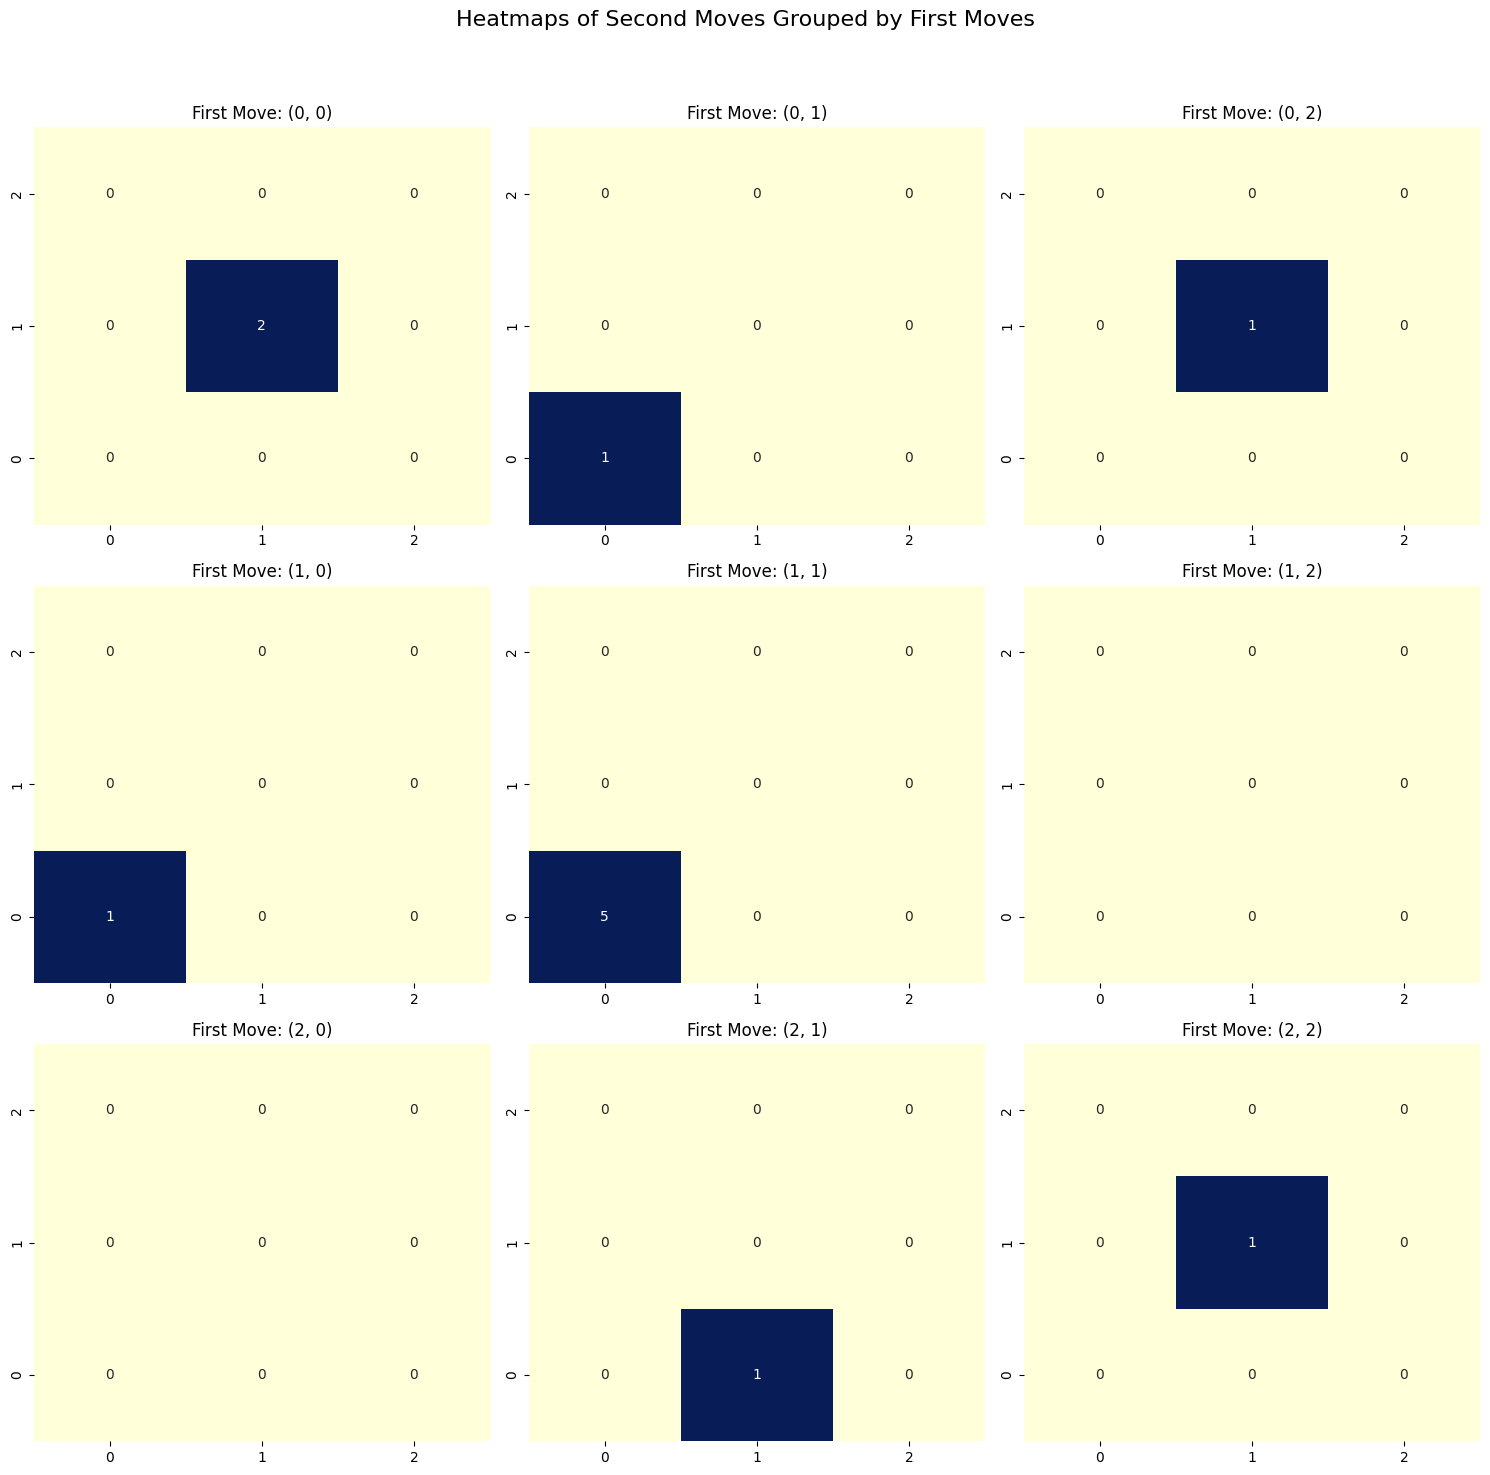

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

first_moves = result_df.groupby("id").agg(
    row_first=("row", "first"),
    col_first=("col", "first")
).reset_index()

second_moves = (
    result_df
    .groupby("id")
    .nth(1)  # nth(1) gives the second row in each group
    .reset_index()
    .rename(columns={"row": "row_second", "col": "col_second"})
)

merged_moves = pd.merge(first_moves, second_moves[["id", "row_second", "col_second"]], on="id", how="inner")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Heatmaps of Second Moves Grouped by First Moves", fontsize=16)

for row in range(3):
    for col in range(3):
        filtered_moves = merged_moves[(merged_moves["row_first"] == row) & (merged_moves["col_first"] == col)]

        heatmap_data = np.zeros((3, 3), dtype=int)
        for _, move in filtered_moves.iterrows():
            r2 = move["row_second"]
            c2 = move["col_second"]
            if pd.notnull(r2) and pd.notnull(c2):
                heatmap_data[int(r2), int(c2)] += 1

        # noinspection PyTypeChecker
        sns.heatmap(
            heatmap_data, 
            annot=True, 
            fmt="d", 
            cmap="YlGnBu", 
            ax=axes[row, col], 
            cbar=False,
            xticklabels=[0, 1, 2], 
            yticklabels=[0, 1, 2]
        )
        axes[row, col].set_title(f"First Move: ({row}, {col})")
        axes[row, col].invert_yaxis()

# noinspection PyTypeChecker
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()